In [1]:
#從sklearn 下載 iris 資料集用 KMeans 做 Cluster 

from sklearn.datasets import load_iris 
import pandas as pd


iris = load_iris()
df = pd.DataFrame(iris["data"], columns = iris["feature_names"]) 
df["target"] = iris["target"]

df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [2]:
#用讀取過的資料做出公式, 再拿沒讀取過的資料驗證公式的好壞

from sklearn.model_selection import train_test_split
# train _test_split 常用的交叉驗證函式，功能是從樣本中隨機的按比例選取train_data和test_data。 tuple(特徵 90%,特徵10%,目標90%,目標10%)


x_train, x_test, y_train, y_test = train_test_split(iris["data"], iris["target"],test_size = 0.1)
# train_test_split()三個重要參數(x題目、y答案、多少比例做驗證)

In [3]:
#做訓練(fit)
from sklearn.cluster import KMeans # KMeans做分群的函式
clu = KMeans(n_clusters = 3) #在已知幾種的情況下，k就可以直接指定

clu.fit(x_train) #分群在做訓練時不能帶答案(y)進去，只能帶題目


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [4]:
#看被訓練得資料怎麼被分群
clu.labels_  

array([2, 0, 1, 1, 2, 1, 1, 0, 0, 1, 0, 2, 0, 1, 1, 2, 1, 2, 0, 0, 1, 2,
       1, 1, 0, 1, 0, 1, 2, 0, 1, 1, 1, 0, 2, 1, 0, 1, 2, 1, 0, 1, 1, 2,
       2, 1, 1, 1, 2, 0, 2, 2, 0, 2, 2, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 2,
       0, 1, 0, 2, 1, 0, 1, 2, 0, 0, 0, 2, 2, 0, 2, 1, 1, 1, 0, 0, 2, 0,
       1, 2, 1, 1, 1, 0, 0, 1, 2, 1, 1, 0, 1, 1, 0, 1, 2, 1, 2, 0, 2, 0,
       1, 0, 1, 2, 1, 1, 0, 0, 1, 0, 2, 2, 1, 2, 0, 1, 2, 2, 1, 1, 0, 2,
       2, 0, 1])

In [5]:
#驗證訓練出來的公式好壞 (正常做 KMeans分群 不需驗證，分類好即可 )

pre = clu.predict(x_test) #預測.predict(x_test)
print("預測結果:",list(pre))
print("真正結果:", list(y_test))

#衡量方法(sklearn.metrics)
from sklearn.metrics import accuracy_score #準確率 ，有可能會結果 0 變成 1 或 2，多重新分群幾次即可
score = accuracy_score(clu.predict(x_test),y_test)
print("正確率:",score)

預測結果: [1, 0, 0, 0, 2, 1, 1, 1, 2, 0, 0, 0, 1, 1, 1]
真正結果: [1, 0, 0, 0, 2, 1, 1, 2, 2, 0, 0, 0, 1, 1, 1]
正確率: 0.9333333333333333


In [11]:
#當不知道 k時，用silhouette_score 把有可能的 k值 計算出來
from sklearn.metrics import silhouette_score 

#刪除target (答案)
x = df.drop(["target"],axis = 1) # axis = 1 drop行  ,   axis = 0 drop列 

#創建空的list，放值 
xs = []
ys = []

#嘗試 K的值2-5分別的準確率
for k in range(2, 6):
   
    clu = KMeans(n_clusters = k)
    clu.fit(x)
   
    s = silhouette_score(x, clu.labels_) #silhouette_score()參數(題目、分群的labels)
        
    xs.append(k)
    ys.append(s)


print("k值:", xs)
print("Score:" ,ys)

k值: [2, 3, 4, 5]
Score: [0.681046169211746, 0.5528190123564091, 0.4980505049972867, 0.49308040671935127]


Text(0, 0.5, 'Score')

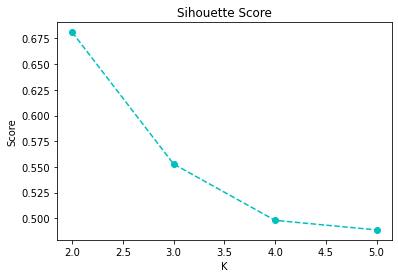

In [14]:
import matplotlib.pyplot as plt #視覺化做圖

#在 jpnb裡 %matplotlib inline 可以省略.show()
%matplotlib inline


plt.plot(plotx,ploty,"co--") #plot參數(x座標、y座標)  第三個參數(更改線的顏色跟線條) 可搜尋 matplot pyplot 尋找format color 自訂參數 

plt.title("Sihouette Score") #字串只能打英文(不支援中文字)
plt.xlabel("K") 
plt.ylabel("Score")